In [12]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as T
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from tools.vis import plot_features
from modules.vgg import vgg11, vgg11_bn, vgg13, vgg13_bn, vgg16, vgg16_bn, vgg19, vgg19_bn
from modules.resnet import resnet18, resnet34, resnet50
from modules.demo import ResNet9
from tools.prune import mean_feature_maps, prune

In [13]:
DATA_DIR = './data'

NUM_TRAIN = 49000

transform_test = T.Compose([
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

batch_size = 128

# 测试集
cifar10_test = dset.CIFAR10(root=DATA_DIR, train=False, download=True, transform=transform_test)
loader_test = DataLoader(cifar10_test, batch_size=batch_size)

Files already downloaded and verified


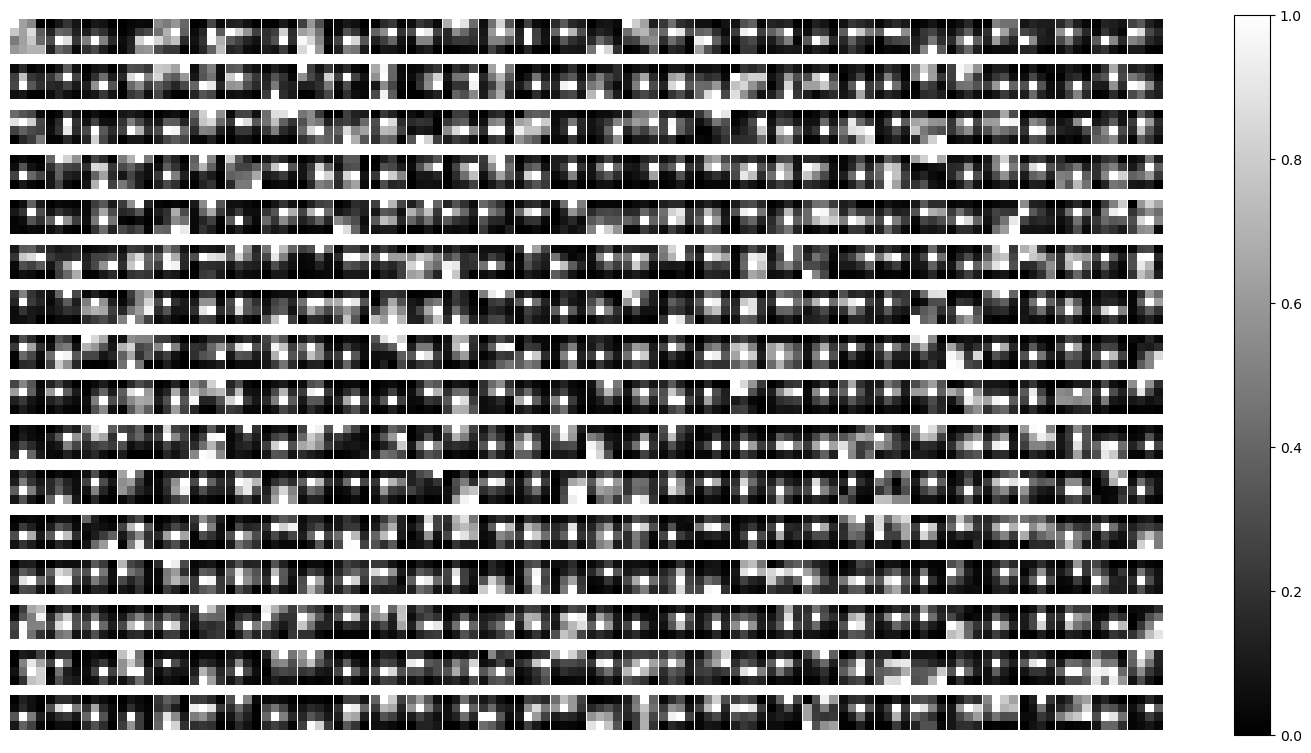

In [14]:
resnet9 = ResNet9()
resnet9.load_state_dict(torch.load('models/demo.pth'))
resnet9_fm = mean_feature_maps(loader_test, resnet9)
plot_features(resnet9_fm)

In [15]:
# prune
neuron_nums, resnet9_acc_history = prune(resnet9, resnet9_fm, loader_test)

Checking accuracy on test set
Got 9128 / 10000 correct (91.28)
Class	Accuracy
----------------
plane 	 |  93.9
car   	 |  96.7
bird  	 |  87.4
cat   	 |  82.3
deer  	 |  90.9
dog   	 |  86.1
frog  	 |  93.1
horse 	 |  93.5
ship  	 |  94.6
truck 	 |  94.3
0 neurons: 0.91%
Checking accuracy on test set
Got 9141 / 10000 correct (91.41)
Class	Accuracy
----------------
plane 	 |  94.1
car   	 |  96.4
bird  	 |  87.0
cat   	 |  83.1
deer  	 |  90.6
dog   	 |  85.8
frog  	 |  94.0
horse 	 |  93.7
ship  	 |  94.6
truck 	 |  94.8
32 neurons: 0.91%
Checking accuracy on test set
Got 9139 / 10000 correct (91.39)
Class	Accuracy
----------------
plane 	 |  93.8
car   	 |  96.4
bird  	 |  86.8
cat   	 |  82.7
deer  	 |  90.4
dog   	 |  85.8
frog  	 |  94.7
horse 	 |  94.0
ship  	 |  94.5
truck 	 |  94.8
64 neurons: 0.91%
Checking accuracy on test set
Got 9138 / 10000 correct (91.38)
Class	Accuracy
----------------
plane 	 |  93.9
car   	 |  95.9
bird  	 |  85.5
cat   	 |  82.3
deer  	 |  91.3
dog   	

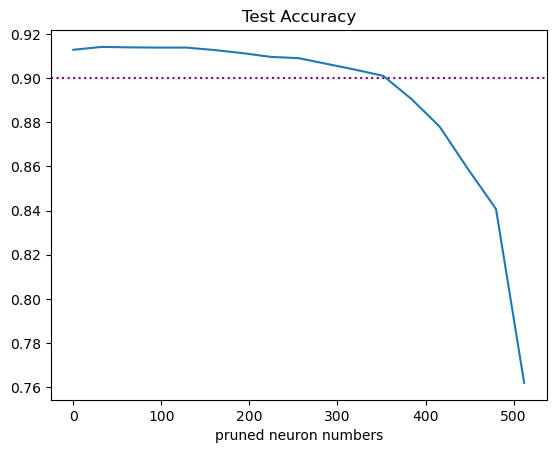

In [16]:
plt.title('Test Accuracy')
plt.xlabel('pruned neuron numbers')
plt.axhline(y=0.9, ls=':', c='purple')
plt.plot(neuron_nums, resnet9_acc_history, '-')
plt.show()

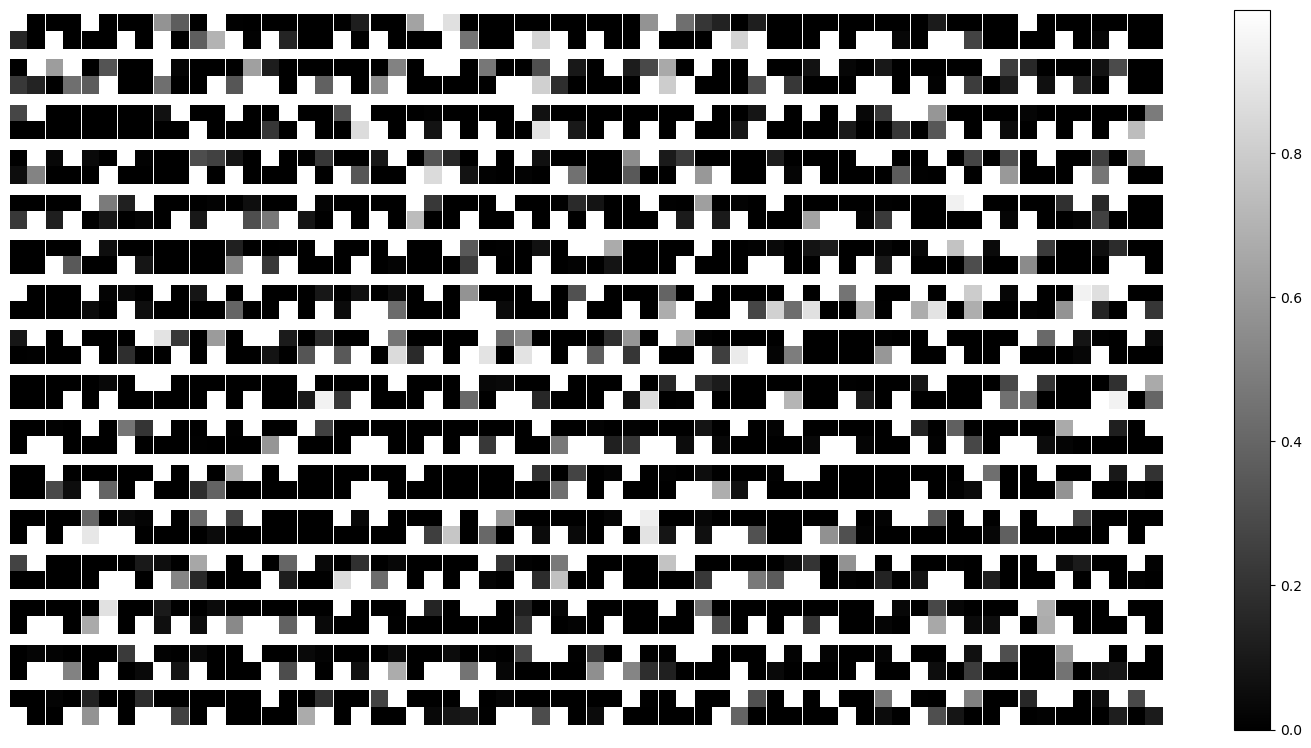

In [17]:
vgg13_bn_ = vgg13_bn(num_classes=10)
vgg13_bn_.load_state_dict(torch.load('models/vgg.pth'))

# calculate the mean feature maps on test dataset
vgg13_bn_fm = mean_feature_maps(loader_test, vgg13_bn_)

plot_features(vgg13_bn_fm)

In [18]:
# prune
neuron_nums, vgg13_bn_acc_history = prune(vgg13_bn_, vgg13_bn_fm, loader_test)

Checking accuracy on test set
Got 9194 / 10000 correct (91.94)
Class	Accuracy
----------------
plane 	 |  93.5
car   	 |  96.1
bird  	 |  89.2
cat   	 |  82.8
deer  	 |  93.9
dog   	 |  87.4
frog  	 |  94.4
horse 	 |  93.1
ship  	 |  95.6
truck 	 |  93.4
0 neurons: 0.92%
Checking accuracy on test set
Got 9195 / 10000 correct (91.95)
Class	Accuracy
----------------
plane 	 |  93.7
car   	 |  96.1
bird  	 |  89.7
cat   	 |  83.1
deer  	 |  94.2
dog   	 |  87.3
frog  	 |  93.9
horse 	 |  92.8
ship  	 |  95.3
truck 	 |  93.4
32 neurons: 0.92%
Checking accuracy on test set
Got 9170 / 10000 correct (91.70)
Class	Accuracy
----------------
plane 	 |  88.4
car   	 |  96.5
bird  	 |  90.2
cat   	 |  82.6
deer  	 |  94.4
dog   	 |  87.7
frog  	 |  94.0
horse 	 |  93.3
ship  	 |  96.4
truck 	 |  93.5
64 neurons: 0.92%
Checking accuracy on test set
Got 9147 / 10000 correct (91.47)
Class	Accuracy
----------------
plane 	 |  85.7
car   	 |  96.4
bird  	 |  89.9
cat   	 |  82.4
deer  	 |  94.2
dog   	

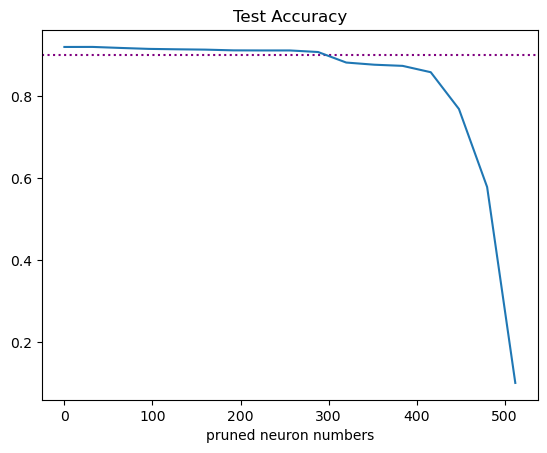

In [19]:
plt.title('Test Accuracy')
plt.xlabel('pruned neuron numbers')
plt.axhline(y=0.9, ls=':', color='purple')
plt.plot(neuron_nums, vgg13_bn_acc_history, '-')
plt.show()